In [2]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [3]:
import os
print(os.getcwd())
import os

# Load the dataset
bike_data = pd.read_csv("Bicycle_Thefts_Open_Data.csv")

/Users/benjaminlefebvre/Documents/Software Engineering/Semester 5/Data Warehouse/DataWareHousing_FinalProject/python_server


-----------------------------------
-------- Data exploration ---------
-----------------------------------


--------------------------
-------- Summary ---------
--------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37178 entries, 0 to 37177
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OBJECTID           37178 non-null  int64  
 1   EVENT_UNIQUE_ID    37178 non-null  object 
 2   PRIMARY_OFFENCE    37178 non-null  object 
 3   OCC_DATE           37178 non-null  object 
 4   OCC_YEAR           37178 non-null  int64  
 5   OCC_MONTH          37178 non-null  object 
 6   OCC_DOW            37178 non-null  object 
 7   OCC_DAY            37178 non-null  int64  
 8   OCC_DOY            37178 non-null  int64  
 9   OCC_HOUR           37178 non-null  int64  
 10  REPORT_DATE        37178 non-null  object 
 11  REPORT_YEAR        37178 non-null  int64  
 12  REPORT_MONTH       371

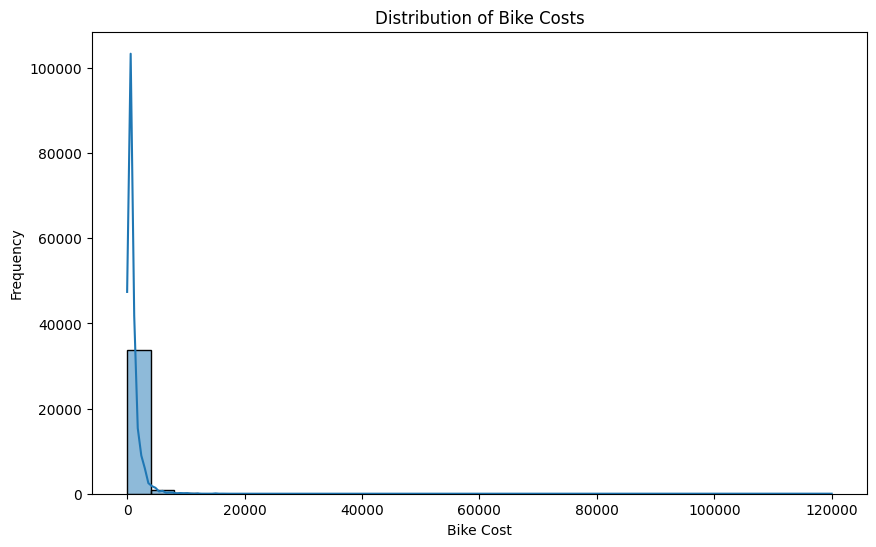


--------------------------------------
-------- Correlation heatmap ---------
--------------------------------------



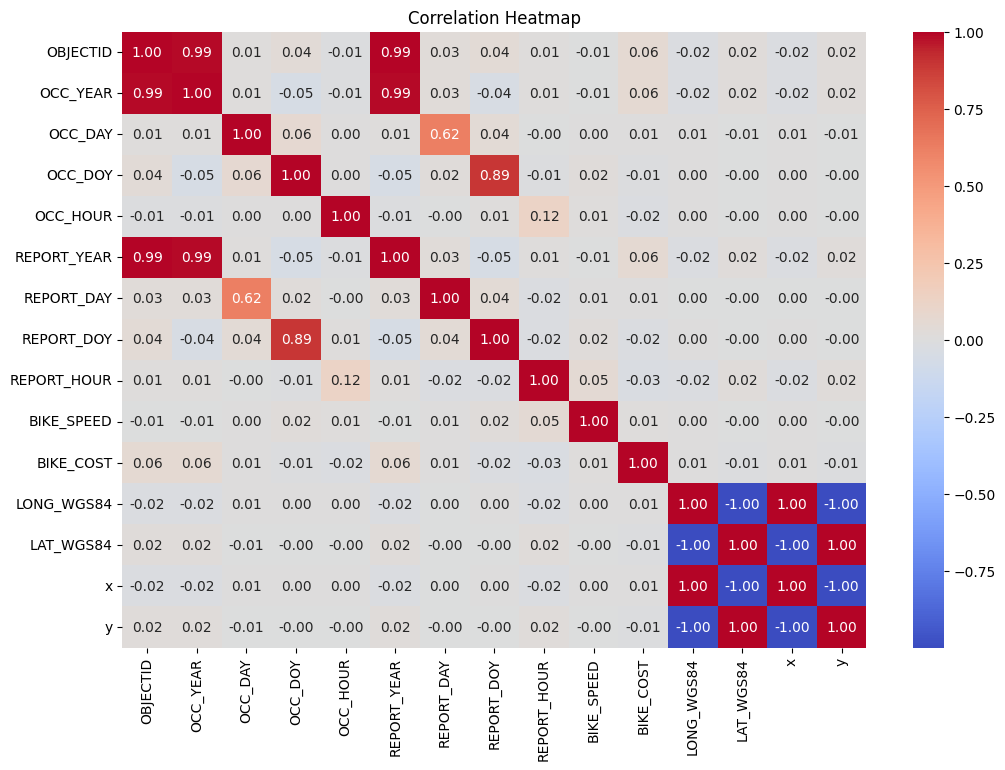


--------------------------------------------------------
-------- Histogram of STATUS based on OCC_YEAR ---------
--------------------------------------------------------



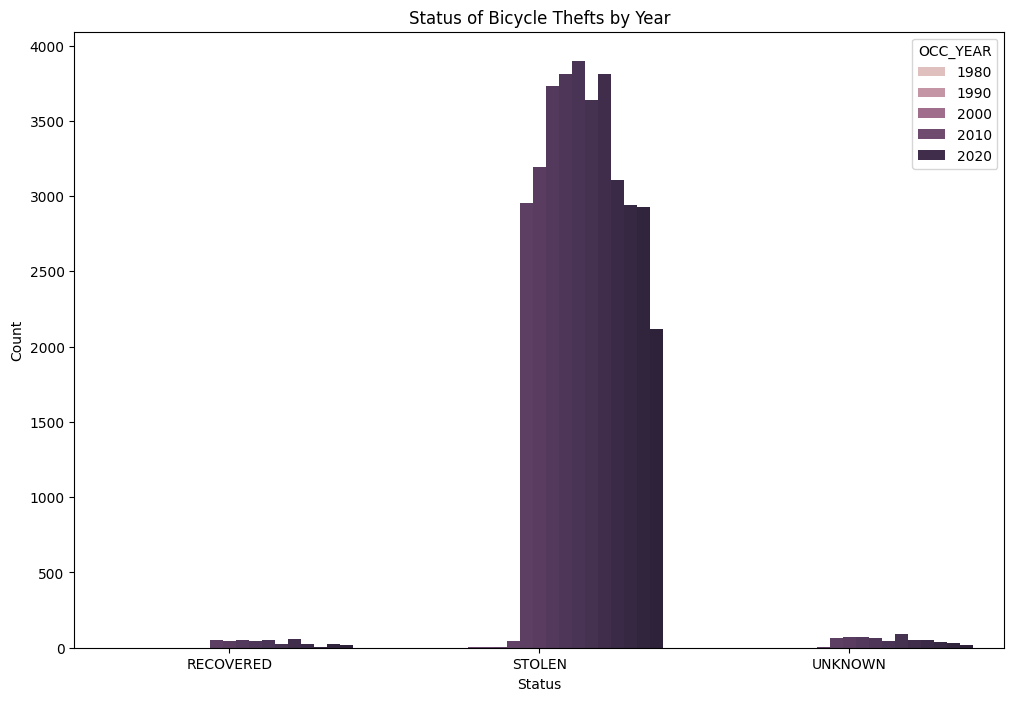


---------------------------------------------------------
-------- Histogram of STATUS based on OCC_MONTH ---------
---------------------------------------------------------



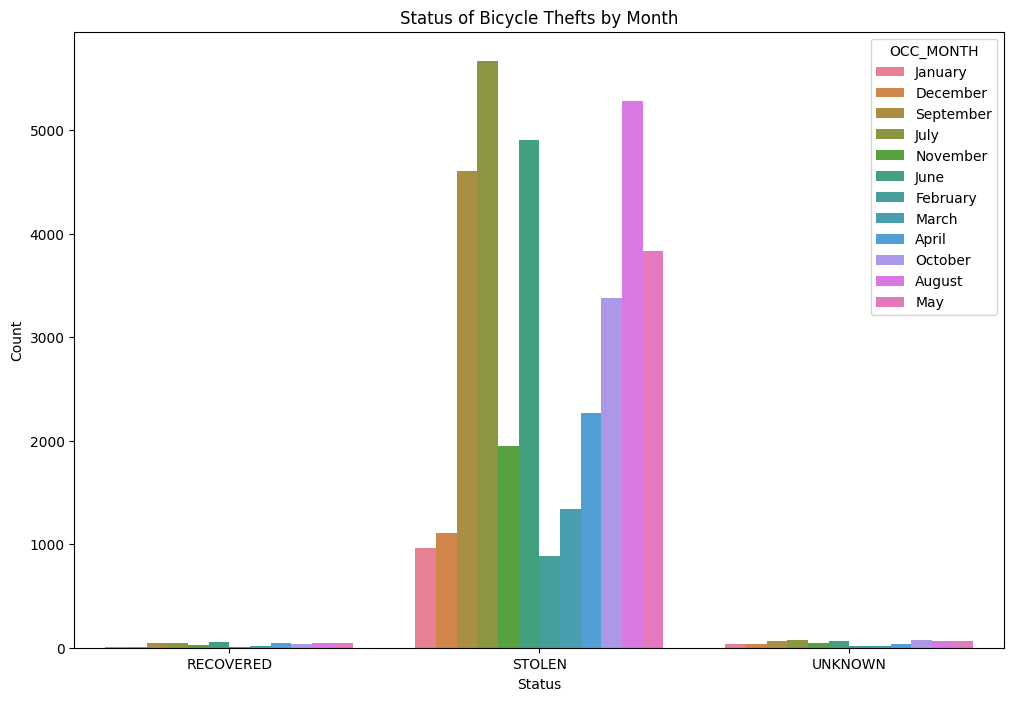


--------------------------------------------------------
-------- Histogram of STATUS based on OCC_DOW ----------
--------------------------------------------------------



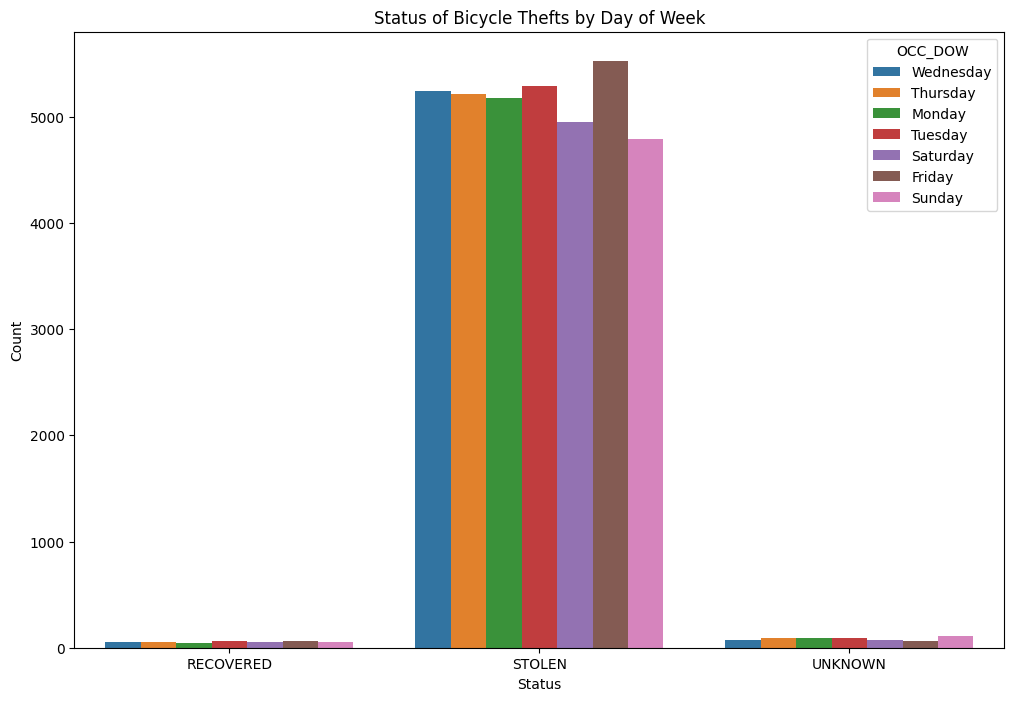


--------------------------------------------------------
-------- Histogram of STATUS based on DIVISION ---------
--------------------------------------------------------



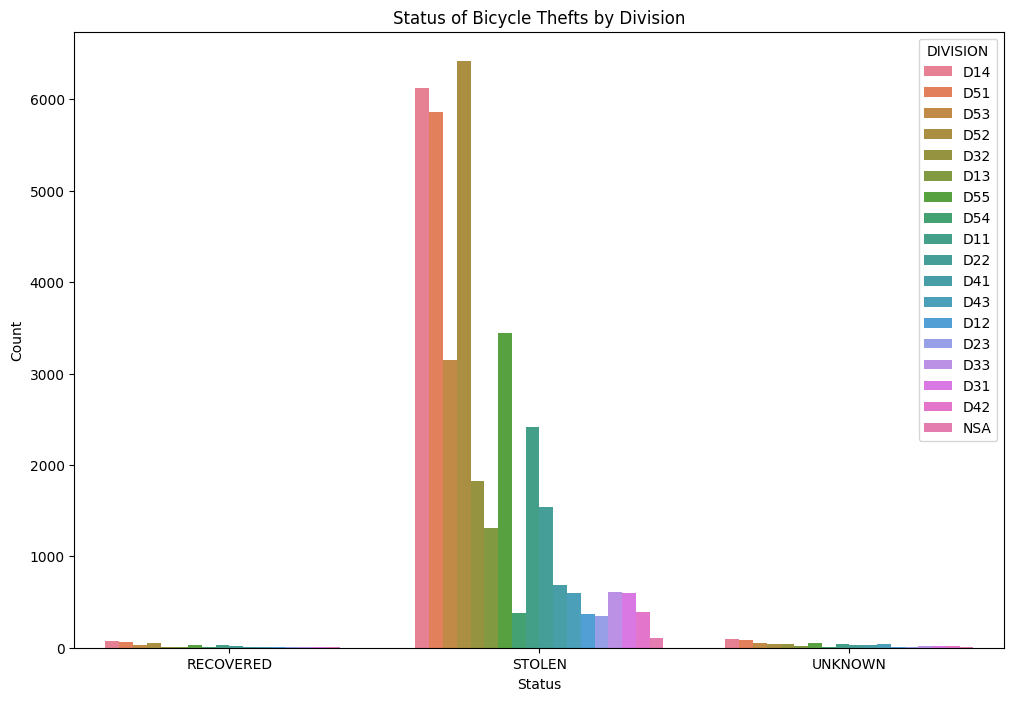


-------------------------------------------------------------
-------- Histogram of STATUS based on LOCATION_TYPE ---------
-------------------------------------------------------------



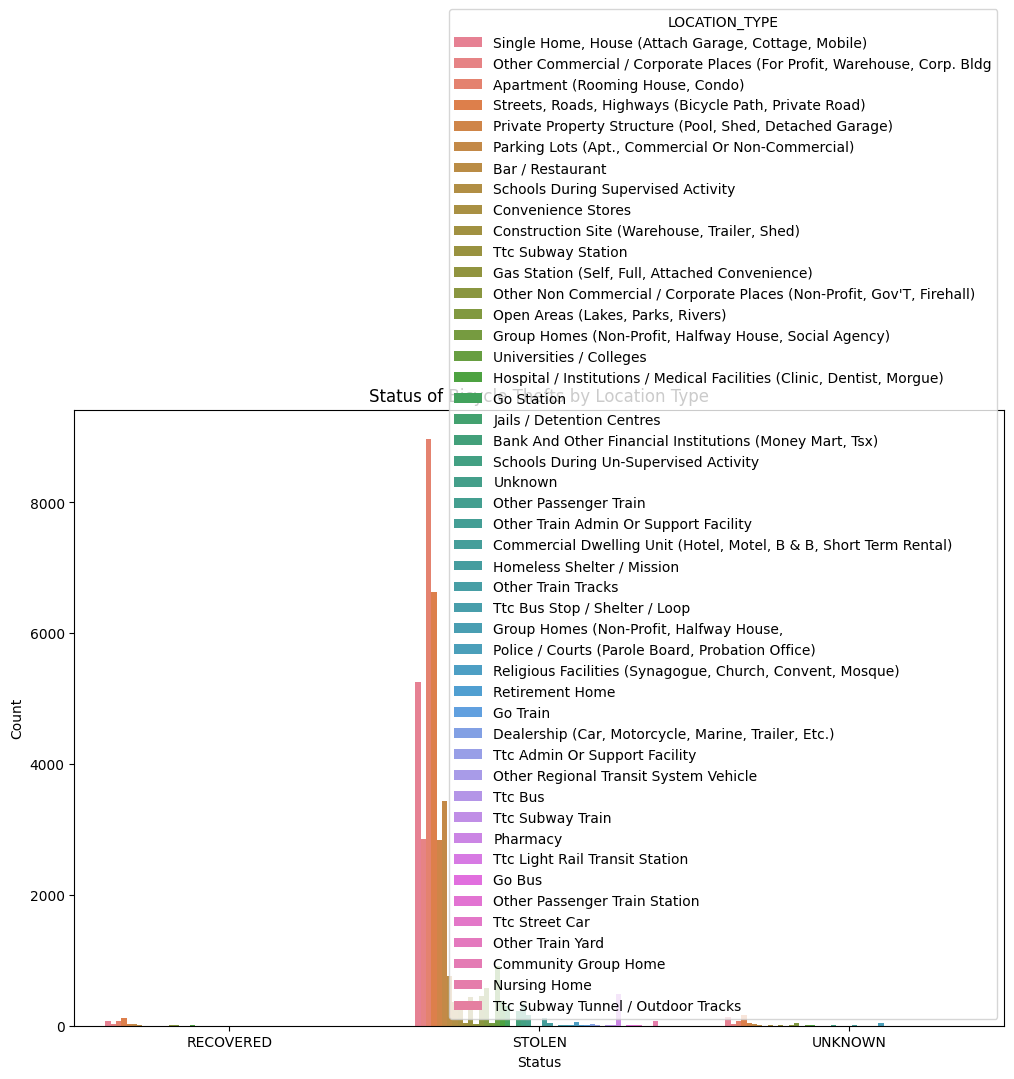


------------------------------------------------------------
-------- Histogram of STATUS based on PREMISES_TYPE ---------
------------------------------------------------------------



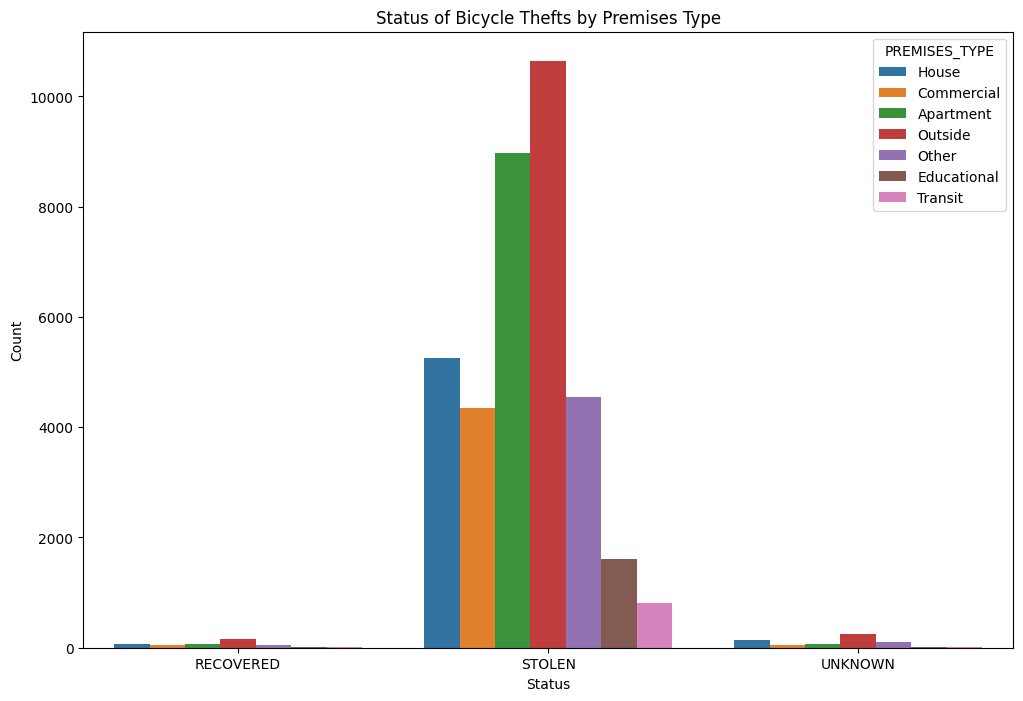


---------------------------------------------------------
-------- Histogram of STATUS based on BIKE_COST ---------
---------------------------------------------------------



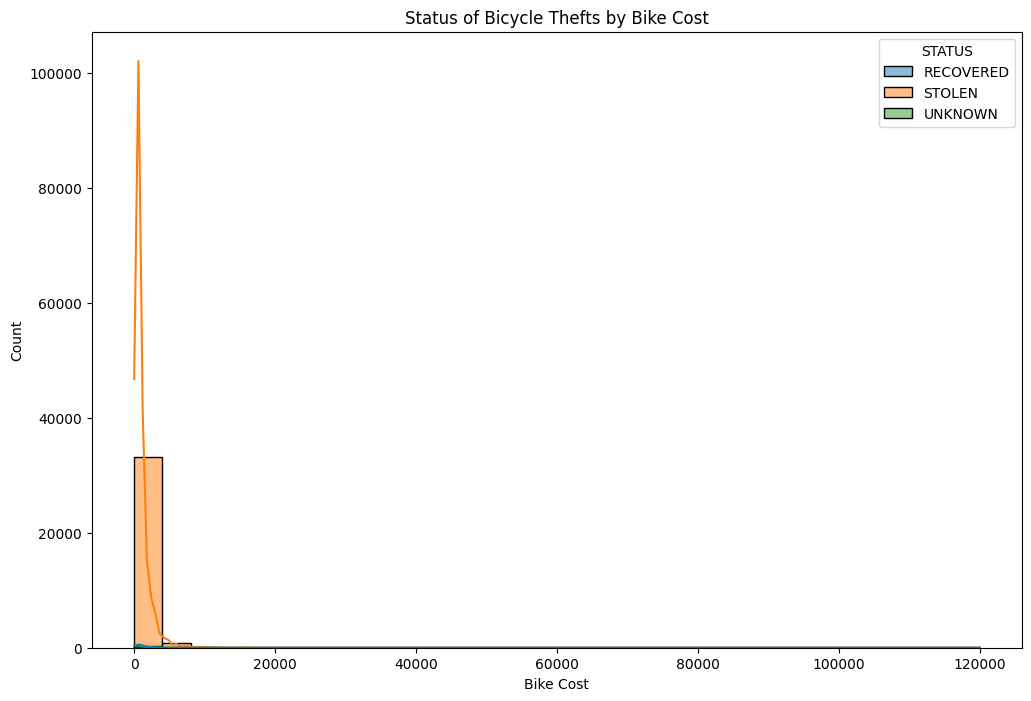


-------------------------------------------------
-------- Histogram of mean of BIKE_COST ---------
-------------------------------------------------



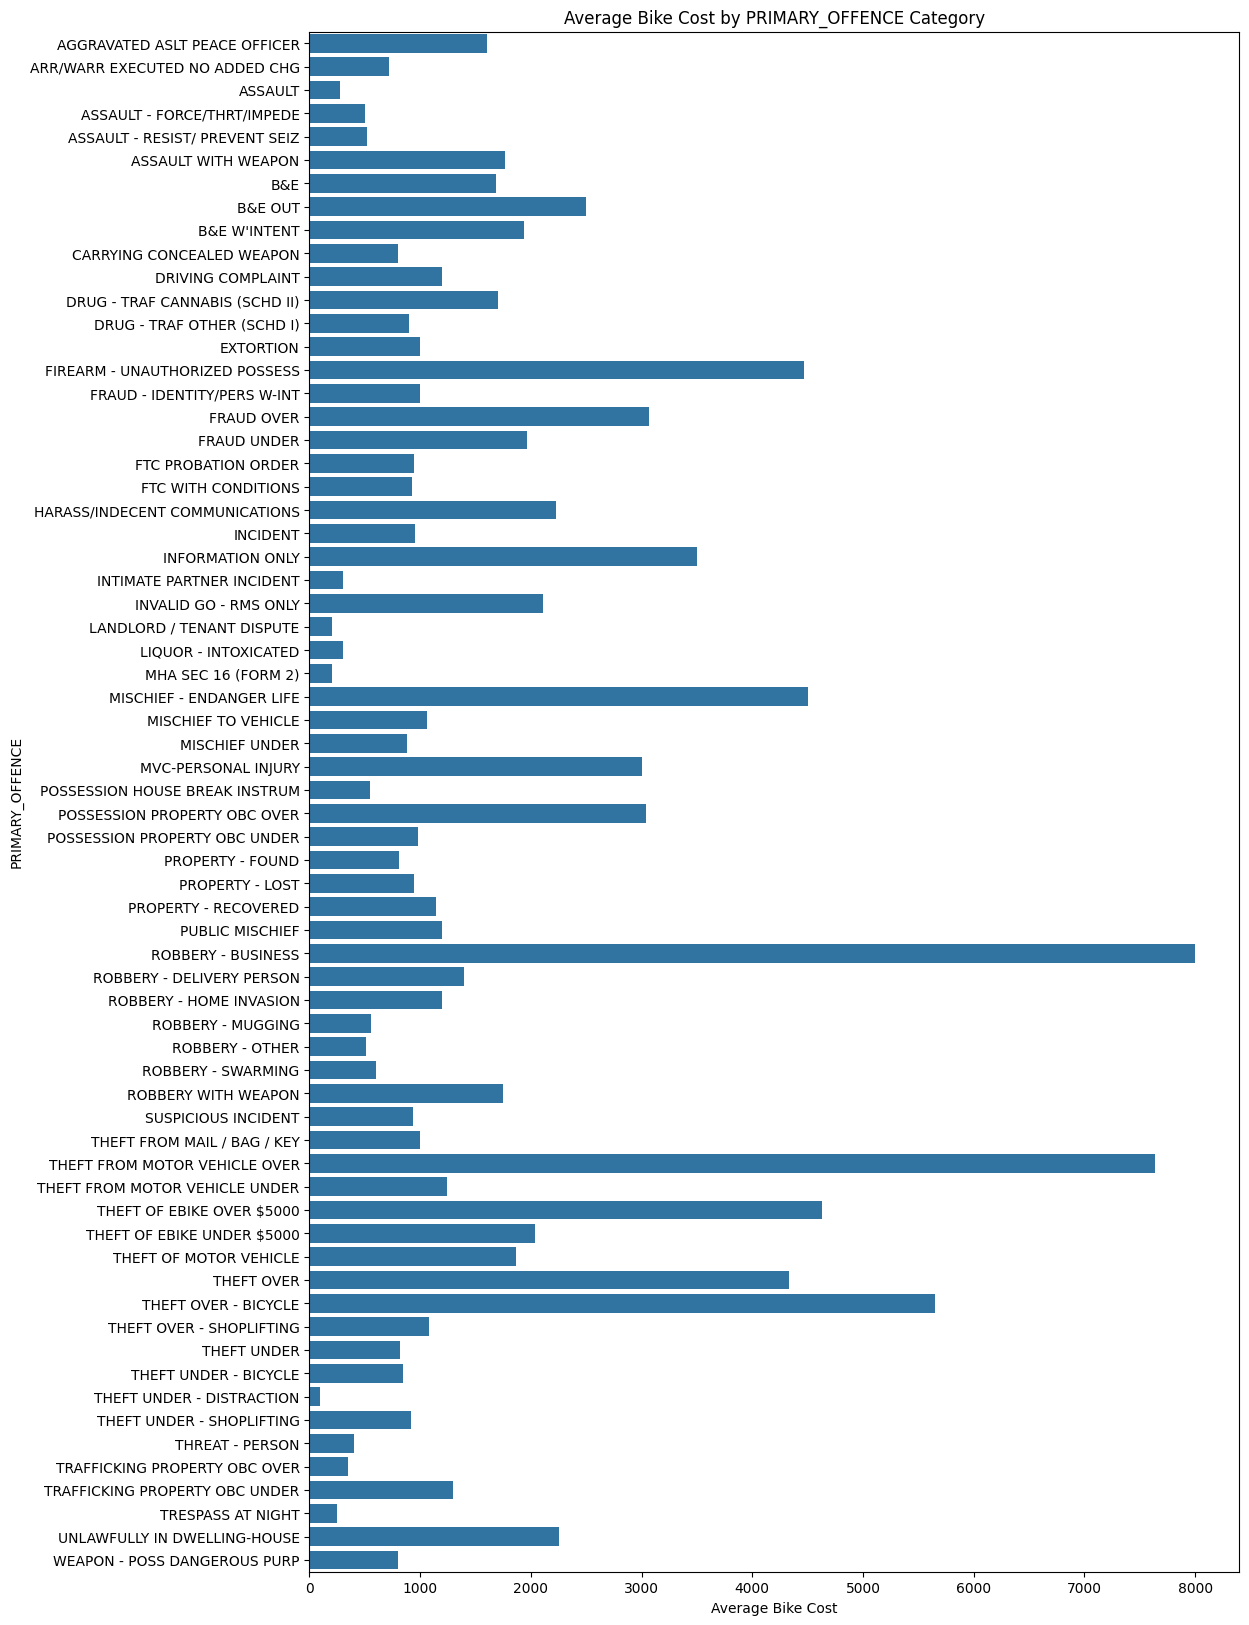

In [11]:
## 1 -  Data exploration (Benjamin Lefebvre - 301234587)

# a) Load and describe data elements (columns), provide descriptions & types, ranges and values of elements as appropriate - use pandas, numpy and any other python packages.
# b) Statistical assessments including means, averages, and correlations.
# c) Missing data evaluations
# d) Graphs and visualizations

print("-----------------------------------")
print("-------- Data exploration ---------")
print("-----------------------------------")
print("")

# Quick summary of the dataset
print("")
print("--------------------------")
print("-------- Summary ---------")
print("--------------------------")
print("")

print(bike_data.info())

# Statistical summary of the dataset
print("")
print("------------------------------------------")
print("-------- Statistical Assessments ---------")
print("------------------------------------------")
print("")

print(bike_data.describe())

# Display the first few rows of the dataset
print("")
print("---------------------------------")
print("-------- First Few Rows ---------")
print("---------------------------------")
print("")
print(bike_data.head())

# Display the data range of each column
print("")
print("-------------------------------------")
print("-------- Columns Data Range ---------")
print("-------------------------------------")
print("")
for column in bike_data.columns:
    if bike_data[column].dtype in [np.int64, np.float64]:
        min_value = bike_data[column].min()
        max_value = bike_data[column].max()
        print(f"{column}: Min: {min_value}, Max: {max_value}")
    else:
        unique_values = bike_data[column].unique()
        print(f"Unique values in column '{column}':")
        print(unique_values)

    print("")

# Display the data types of each column
print("")
print("------------------------------------")
print("-------- Columns Data Type ---------")
print("------------------------------------")
print("")
print(bike_data.dtypes)

# Check for missing values
print("")
print("-------------------------------")
print("-------- Missing Data ---------")
print("-------------------------------")
print("")
print(bike_data.isnull().sum())

# Select only numeric columns for correlation matrix
numeric_data = bike_data.select_dtypes(include=[np.number])

# Correlation matrix
print("")
print("-------------------------------------")
print("-------- Correlation Matrix ---------")
print("-------------------------------------")
print("")
print(numeric_data.corr())

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of bike costs
print("")
print("------------------------------------------")
print("-------- Histogram of bike costs ---------")
print("------------------------------------------")
print("")
plt.figure(figsize=(10, 6))
sns.histplot(bike_data['BIKE_COST'], bins=30, kde=True)
plt.title('Distribution of Bike Costs')
plt.xlabel('Bike Cost')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap
print("")
print("--------------------------------------")
print("-------- Correlation heatmap ---------")
print("--------------------------------------")
print("")
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Histogram of mean of BIKE_COST based on PRIMARY_OFFENCE
# Histogram STATUS based on OCC_YEAR
print("")
print("--------------------------------------------------------")
print("-------- Histogram of STATUS based on OCC_YEAR ---------")
print("--------------------------------------------------------")
print("")

plt.figure(figsize=(12, 8))
sns.countplot(x='STATUS', hue='OCC_YEAR', data=bike_data)
plt.title('Status of Bicycle Thefts by Year')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

# Histogram STATUS based on OCC_MONTH
print("")
print("---------------------------------------------------------")
print("-------- Histogram of STATUS based on OCC_MONTH ---------")
print("---------------------------------------------------------")
print("")

plt.figure(figsize=(12, 8))
sns.countplot(x='STATUS', hue='OCC_MONTH', data=bike_data)
plt.title('Status of Bicycle Thefts by Month')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()


# Histogram STATUS based on OCC_DOW
print("")
print("--------------------------------------------------------")
print("-------- Histogram of STATUS based on OCC_DOW ----------")
print("--------------------------------------------------------")
print("")

plt.figure(figsize=(12, 8))
sns.countplot(x='STATUS', hue='OCC_DOW', data=bike_data)
plt.title('Status of Bicycle Thefts by Day of Week')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

# Histogram STATUS based on DIVISION
print("")
print("--------------------------------------------------------")
print("-------- Histogram of STATUS based on DIVISION ---------")
print("--------------------------------------------------------")
print("")

plt.figure(figsize=(12, 8))
sns.countplot(x='STATUS', hue='DIVISION', data=bike_data)
plt.title('Status of Bicycle Thefts by Division')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

# Histogram STATUS based on LOCATION_TYPE
print("")
print("-------------------------------------------------------------")
print("-------- Histogram of STATUS based on LOCATION_TYPE ---------")
print("-------------------------------------------------------------")
print("")

plt.figure(figsize=(12, 8))
sns.countplot(x='STATUS', hue='LOCATION_TYPE', data=bike_data)
plt.title('Status of Bicycle Thefts by Location Type')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

# Histogram STATUS based on PREMISES_TYPE
print("")
print("------------------------------------------------------------")
print("-------- Histogram of STATUS based on PREMISES_TYPE ---------")
print("------------------------------------------------------------")
print("")

plt.figure(figsize=(12, 8))
sns.countplot(x='STATUS', hue='PREMISES_TYPE', data=bike_data)
plt.title('Status of Bicycle Thefts by Premises Type')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

# Histogram STATUS based on BIKE_COST
print("")
print("---------------------------------------------------------")
print("-------- Histogram of STATUS based on BIKE_COST ---------")
print("---------------------------------------------------------")
print("")

plt.figure(figsize=(12, 8))
sns.histplot(data=bike_data, x='BIKE_COST', hue='STATUS', bins=30, kde=True)
plt.title('Status of Bicycle Thefts by Bike Cost')
plt.xlabel('Bike Cost')
plt.ylabel('Count')
plt.show()

# Histogram STATUS based on NEIGHBOURHOOD_158
print("")
print("-------------------------------------------------")
print("-------- Histogram of mean of BIKE_COST ---------")
print("-------------------------------------------------")
print("")

# Calculate the mean BIKE_COST for each PRIMARY_OFFENCE category
mean_bike_cost_by_offence = bike_data.groupby('PRIMARY_OFFENCE')['BIKE_COST'].mean()

# Remove categories with NaN values
mean_bike_cost_by_offence = mean_bike_cost_by_offence.dropna()

plt.figure(figsize=(12, 20))
sns.barplot(x=mean_bike_cost_by_offence.values, y=mean_bike_cost_by_offence.index)
plt.title('Average Bike Cost by PRIMARY_OFFENCE Category')
plt.xlabel('Average Bike Cost')
plt.ylabel('PRIMARY_OFFENCE')
plt.show()

In [12]:
## 2 - Data modelling

def analyze_class_distribution(df, target_column='STATUS'):
    """
    Analyze and visualize class distribution in the target variable.
    Also provides statistical measures of imbalance.
    """
    # Calculate class distribution
    class_counts = df[target_column].value_counts()
    total_samples = len(df)
    
    print("\n=== Class Distribution Analysis ===")
    print("\nAbsolute counts per class:")
    df.reset_option('display.max_rows')
    df.reset_option('display.max_columns')

    print(class_counts)
    
    # Calculate percentages
    class_percentages = (class_counts / total_samples) * 100
    print("\nPercentage distribution:")
    for class_name, percentage in class_percentages.items():
        print(f"{class_name}: {percentage:.2f}%")
    
    # Calculate imbalance metrics
    majority_class = class_counts.max()
    minority_class = class_counts.min()
    imbalance_ratio = majority_class / minority_class
    
    print(f"\nImbalance ratio (majority:minority): {imbalance_ratio:.2f}:1")
    
    # Visualize distribution
    plt.figure(figsize=(10, 6))
    sns.barplot(x=class_counts.index, y=class_counts.values)
    plt.title('Class Distribution in Target Variable')
    plt.ylabel('Count')
    plt.xlabel('Status')
    for i, v in enumerate(class_counts.values):
        plt.text(i, v, str(v), ha='center', va='bottom')
    plt.tight_layout()
    plt.show()
    
    return class_counts, imbalance_ratio

def identify_features_importance_by_class(df, target_column='STATUS'):
    """
    Analyze the relationship between features and target classes
    to understand which features might be most important for prediction.
    """
    # Analyze categorical features
    categorical_columns = df.select_dtypes(include=['object']).columns
    categorical_columns = [col for col in categorical_columns if col != target_column]
    
    for column in categorical_columns:
        print(f"\n=== Analysis of {column} by {target_column} ===")
        cross_tab = pd.crosstab(df[column], df[target_column], normalize='index') * 100
        print("\nPercentage of each class by category:")
        print(cross_tab)
    
    # Analyze numerical features
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    
    for column in numerical_columns:
        print(f"\n=== Analysis of {column} by {target_column} ===")
        print("\nMean value by class:")
        print(df.groupby(target_column)[column].mean())
        
        # Visualize distribution
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=target_column, y=column, data=df)
        plt.title(f'Distribution of {column} by {target_column}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

def suggest_handling_strategy(imbalance_ratio):
    """
    Suggest appropriate strategies for handling class imbalance
    based on the imbalance ratio.
    """
    print("\n=== Recommended Strategies for Handling Class Imbalance ===")
    
    if imbalance_ratio < 3:
        print("Mild imbalance detected. Consider:")
        print("1. Using standard algorithms with their default parameters")
        print("2. Adjusting class weights in the model")
    elif imbalance_ratio < 10:
        print("Moderate imbalance detected. Consider:")
        print("1. SMOTE (Synthetic Minority Over-sampling Technique)")
        print("2. Class weights adjustment")
        print("3. Ensemble methods like Random Forest with balanced class weights")
    else:
        print("Severe imbalance detected. Consider:")
        print("1. Combination of SMOTE and undersampling (SMOTETomek or SMOTEENN)")
        print("2. Deep learning approaches with custom loss functions")
        print("3. Anomaly detection approaches if minority class is very rare")

def main():
    # Load your dataset
    bike_data = pd.read_csv("Bicycle_Thefts_Open_Data.csv")
    
    # Analyze class distribution
    class_counts, imbalance_ratio = analyze_class_distribution(bike_data)
    
    # Analyze feature importance by class
    identify_features_importance_by_class(bike_data)
    
    # Get recommendations for handling the imbalance
    suggest_handling_strategy(imbalance_ratio)
    
    return class_counts, imbalance_ratio

if __name__ == "__main__":
    class_counts, imbalance_ratio = main()


=== Class Distribution Analysis ===

Absolute counts per class:


AttributeError: 'DataFrame' object has no attribute 'reset_option'

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

def imp_features(df):
    
   return [
        'BIKE_TYPE',          # Type of bicycle
        'BIKE_COST',          # Cost of bicycle
        'LOCATION_TYPE',      # Where the theft occurred
        'PREMISES_TYPE',      # Type of premises
        'HOOD_158',           # Neighborhood
        'STATUS'              # Target variable
    ]
def handle_missing_values(df):
    
    # Fill missing values in BIKE_COST with median
    df['BIKE_COST'] = df['BIKE_COST'].fillna(df['BIKE_COST'].median())
    
    # Fill categorical missing values with 'Unknown'
    categorical_columns = ['BIKE_TYPE', 'LOCATION_TYPE', 'PREMISES_TYPE', 'HOOD_158']
    for col in categorical_columns:
        df[col] = df[col].fillna('Unknown')
    
    return df
def encode_categories(df):
    """
    Converts categorical variables to numbers using simple label encoding.
    """
    from sklearn.preprocessing import LabelEncoder
    
    # Columns that need to be encoded
    categorical_columns = ['BIKE_TYPE', 'LOCATION_TYPE', 'PREMISES_TYPE', 'HOOD_158']
    
    # Create a label encoder for each categorical column
    encoders = {}
    for column in categorical_columns:
        encoder = LabelEncoder()
        df[column] = encoder.fit_transform(df[column])
        encoders[column] = encoder
    
    return df, encoders
def scale_features(df):
    """
    Standardizes numerical features by removing the mean and scaling to unit variance.
    """
    from sklearn.preprocessing import StandardScaler
    
    # Select numerical columns
    numerical_columns = ['BIKE_COST']
    
    # Create a StandardScaler object
    scaler = StandardScaler()
    
    # Standardize the numerical columns
    df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
    
    return df, scaler
def handle_class_imbalance(X_train, y_train, method='undersampling'):
    """
    Handles class imbalance using either undersampling or class weights.
    
    Parameters:
        X_train: Training features
        y_train: Target variable
        method: 'undersampling' or 'class_weights'
        
    Returns:
        X_balanced: Balanced features
        y_balanced: Balanced target
    """
    if method == 'undersampling':
        # Convert to DataFrame for easier manipulation
        X_train_df = pd.DataFrame(X_train)
        
        # Separate majority (stolen) and minority (recovered) classes
        stolen_cases = X_train_df[y_train == 0]
        recovered_cases = X_train_df[y_train == 1]
        
        # Undersample majority class to match minority class size
        stolen_cases_undersampled = resample(
            stolen_cases,
            replace=False,
            n_samples=len(recovered_cases),
            random_state=42
        )
        
        # Combine minority class with undersampled majority class
        X_balanced = pd.concat([stolen_cases_undersampled, recovered_cases])
        y_balanced = np.array([0] * len(recovered_cases) + [1] * len(recovered_cases))
        
        print(f"Original dataset shape: {len(y_train)}")
        print(f"Balanced dataset shape: {len(y_balanced)}")
        
        return X_balanced, y_balanced
    
    return X_train, y_train

    
class BikeTheftModeler:
    """
    A modeler for bicycle theft prediction that handles class imbalance.
    Provides options for both undersampling and class weights approaches.
    """
    def __init__(self):
        self.best_model = None
        self.training_method = None
    
    def train_model(self, X_train, y_train, balance_method='undersampling'):
        """
        Trains models using specified class imbalance handling method
        
        Parameters:
            X_train: Training features
            y_train: Training target
            balance_method: How to handle class imbalance ('undersampling' or 'class_weights')
        """
        print("\nStarting model training...")
        print(f"Original class distribution:\n{pd.Series(y_train).value_counts(normalize=True)}")
        
        # Handle class imbalance
        if balance_method == 'undersampling':
            X_balanced, y_balanced = handle_class_imbalance(X_train, y_train, 'undersampling')
            class_weights = None
            self.training_method = 'undersampling'
        else:
            X_balanced, y_balanced = X_train, y_train
            class_weights = 'balanced'
            self.training_method = 'class_weights'
        
        # Create and train model
        model = RandomForestClassifier(
            n_estimators=100,
            class_weight=class_weights,
            random_state=42
        )
        
        print(f"\nTraining with {self.training_method}...")
        model.fit(X_balanced, y_balanced)
        self.best_model = model
        
        return model
    
    def evaluate_model(self, model, X_test, y_test):
        """
        Evaluates model with metrics suitable for imbalanced classification
        """
        # Make predictions
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        
        # Calculate metrics
        print("\nModel Performance:")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
        
        print("\nConfusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        
        print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_proba))
        
        # Calculate and display feature importance
        feature_importance = pd.DataFrame({
            'feature': X_test.columns,
            'importance': model.feature_importances_
        }).sort_values('importance', ascending=False)
        
        print("\nFeature Importance:")
        print(feature_importance)    
        
        
def main():
    # Load and preprocess data
    bike_data = pd.read_csv("Bicycle_Thefts_Open_Data.csv")
    preprocessor = BikeTheftPreprocessor()
    processed_df = preprocessor.preprocess(bike_data)
    
    # Prepare features and target
    X = processed_df.drop(['STATUS', 'TARGET'], axis=1)
    y = processed_df['TARGET']
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Train and evaluate model using undersampling
    modeler = BikeTheftModeler()
    
    # Try both methods and compare
    print("\n=== Training with Undersampling ===")
    model_undersampled = modeler.train_model(X_train, y_train, 'undersampling')
    modeler.evaluate_model(model_undersampled, X_test, y_test)
    
    print("\n=== Training with Class Weights ===")
    model_weighted = modeler.train_model(X_train, y_train, 'class_weights')
    modeler.evaluate_model(model_weighted, X_test, y_test)
    
    return preprocessor, modeler

if __name__ == "__main__":
    preprocessor, modeler = main()

NameError: name 'BikeTheftPreprocessor' is not defined


Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1645
           1       0.00      0.00      0.00        16

    accuracy                           0.99      1661
   macro avg       0.50      0.50      0.50      1661
weighted avg       0.98      0.99      0.99      1661



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(



Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1645
           1       0.00      0.00      0.00        16

    accuracy                           0.99      1661
   macro avg       0.50      0.50      0.50      1661
weighted avg       0.98      0.99      0.98      1661



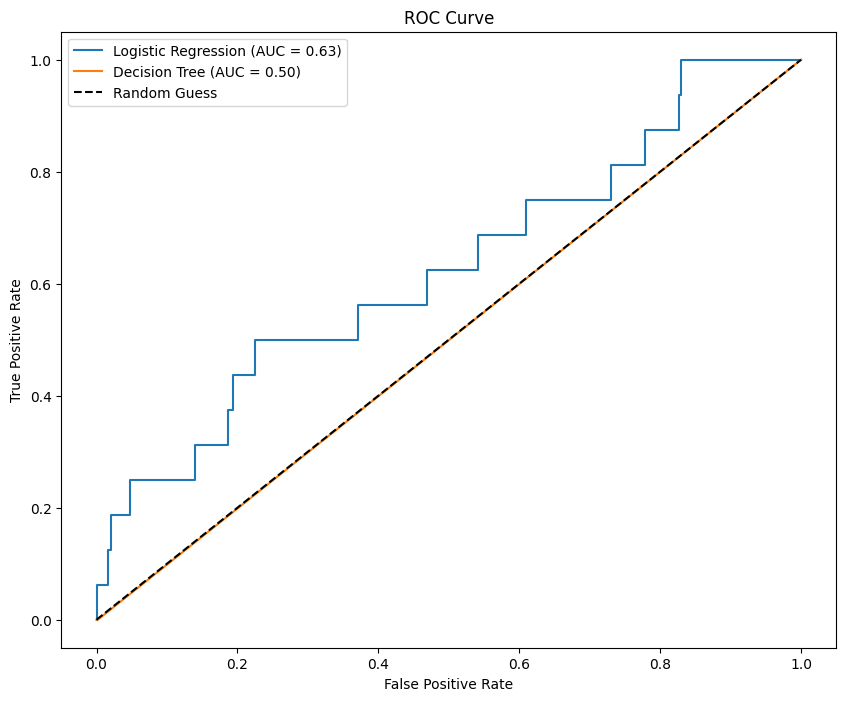


Best model based on F1-Score: Logistic Regression


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score,
    f1_score, roc_curve, auc, classification_report
)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

## 4 - Model scoring and evaluation
df = pd.read_csv('Bicycle_Thefts_Open_Data.csv')
df = df.sample(n=10000, random_state=42)

df = df.dropna()  # Drop missing values for simplicity
X = df.drop(columns=['STATUS'])  
y = df['STATUS'] 

# Convert the target variable to binary (0 for 'STOLEN', 1 for 'RECOVERED')
y = (y == 'RECOVERED').astype(int)

# Convert categorical columns to numerical
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Apply scaling
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
log_reg = LogisticRegression(max_iter=500, solver='lbfgs', class_weight='balanced')
log_reg_params = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['lbfgs', 'liblinear']}
log_reg_cv = GridSearchCV(log_reg, log_reg_params, cv=5, scoring='accuracy')
log_reg_cv.fit(X_train_smote_scaled, y_train_smote)

# Decision Tree
tree_clf = DecisionTreeClassifier(class_weight='balanced')
tree_params = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}
tree_cv = GridSearchCV(tree_clf, tree_params, cv=5, scoring='accuracy')
tree_cv.fit(X_train_smote_scaled, y_train_smote)


# Step 4: Evaluate models
models = {
    "Logistic Regression": log_reg_cv.best_estimator_,
    "Decision Tree": tree_cv.best_estimator_
}

results = {}
plt.figure(figsize=(10, 8))  # For ROC curve plotting

for model_name, model in models.items():
    # Predict using the appropriate scaled or unscaled data
    X_test_input = X_test_scaled if model_name == "Logistic Regression" else X_test
    y_pred = model.predict(X_test_input)
    y_proba = model.predict_proba(X_test_input)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    # Store results
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Confusion Matrix": confusion
    }

    # Print classification report
    print(f"\n{model_name} Classification Report:\n")
    print(classification_report(y_test, y_pred, zero_division=0))

    # Plot ROC curve
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

# Finalize ROC plot
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Step 5: Recommend best model
best_model = max(results, key=lambda k: results[k]['F1-Score'])
print(f"\nBest model based on F1-Score: {best_model}")

In [8]:
## 5 - Deploying the model (Benjamin Lefebvre - 301234587)

# a) Using a flask framework arrange to turn your selected machine-learning model into an API.
# b) Using the pickle module, arrange for Serialization & Deserialization of your model.

from flask import Flask, request, jsonify
import pickle

app = Flask(__name__)

# Save the model


# Load the model


# API Routes
# Get options of the location names in the dataset ,the bike_type,the bike cost ,premises, neighbourhood
@app.route('/options', methods=['GET'])
def get_options():
    options = {
        'DIVISION': bike_data['DIVISION'].unique().tolist(),
        'LOCATION_TYPE': bike_data['LOCATION_TYPE'].unique().tolist(),
        'PREMISES_TYPE': bike_data['PREMISES_TYPE'].unique().tolist(),
        'NEIGHBOURHOOD_158': bike_data['NEIGHBOURHOOD_158'].unique().tolist(),
    }
    return jsonify(options)

# Predict the status of a bike theft
@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    
    # Convert the input data into a DataFrame
    input_data = pd.DataFrame(data, index=[0])
    
    # Preprocess the input data
    input_data = preprocessor.preprocess(input_data)
    
    # Make predictions
    prediction = modeler.best_model.predict(input_data)
    
    return jsonify({'prediction': prediction[0]})

# Run the app
if __name__ == '__main__':
    app.run(debug=True, port=5001)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5001
Press CTRL+C to quit
 * Restarting with stat
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/Users/benjaminlefebvre/Library/Python/3.10/lib/python/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/benjaminlefebvre/Library/Python/3.10/lib/python/site-packages/traitlets/config/application.py", line 1074, in launch_instance
    app.initialize(argv)
  File "/Users/benjaminlefebvre/Library/Python/3.10/lib/python/site-packages/traitlets/config/application.py", line 118, in inner
    return method(app, *args, **kwargs)
  File "/Users/benjaminlefebvre/Library/Python/3.10/lib/python/site-packages/ipykernel/kernelapp

SystemExit: 1

/Users/benjaminlefebvre/Library/Python/3.10/lib/python/site-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
